In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D 

In [6]:
import cv2

In [7]:
import pandas as pd

In [21]:
data = pd.read_csv('mnist_train.csv')

In [25]:
y = data['label']
X = data.drop(columns = 'label')
print(data.shape)

(60000, 785)


In [26]:
X = X/255.0
data = data/255.0

print("X:", X.shape)
print("test_data:", data.shape)

X: (60000, 784)
test_data: (60000, 785)


In [27]:
from sklearn.preprocessing import scale

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,train_size  = 0.7, test_size = 0.3 ,random_state = 10)

In [30]:
X_train.shape

(42000, 784)

In [31]:
print(X_train[4])

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00441808 -0.00575482 -0.00408252 -0.00408252  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00408252 -0.00470969 -0.00879935 -0.01159056
 -0.01475898 -0.01928485 -0.0246718  -0.02907103 -0.03059266 -0.03116401
 -0.03196287 -0.03020254 -0.03131022 -0.0283834  -0.02311919 -0.01916663
 -0.0167723  -0.01099636 -0.00832486 -0.00438069  0.          0.
  0.          0.          0.          0.         -0.00408252 -0.00539535
 -0.00852241 -0.01198504 -0.01765348 -0.0277109  -0.03702009 -0.05215128
 -0.0670362  -0.08301705 -0.0993793  -0.11518413 -0.12913326 -0.13839468
 -0.13888363 -0.13184344 -0.12042952 -0.10189079 -0.0786049  -0.05699561
 -0.03965768 -0.02372839 -0.01408835 -0.00783084  0.          0.
  0.          0.         -0.005368

In [32]:
print(X_train[4])

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00441808 -0.00575482 -0.00408252 -0.00408252  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00408252 -0.00470969 -0.00879935 -0.01159056
 -0.01475898 -0.01928485 -0.0246718  -0.02907103 -0.03059266 -0.03116401
 -0.03196287 -0.03020254 -0.03131022 -0.0283834  -0.02311919 -0.01916663
 -0.0167723  -0.01099636 -0.00832486 -0.00438069  0.          0.
  0.          0.          0.          0.         -0.00408252 -0.00539535
 -0.00852241 -0.01198504 -0.01765348 -0.0277109  -0.03702009 -0.05215128
 -0.0670362  -0.08301705 -0.0993793  -0.11518413 -0.12913326 -0.13839468
 -0.13888363 -0.13184344 -0.12042952 -0.10189079 -0.0786049  -0.05699561
 -0.03965768 -0.02372839 -0.01408835 -0.00783084  0.          0.
  0.          0.         -0.005368

In [33]:
print(y_train[4])

9


TypeError: Invalid shape (784,) for image data

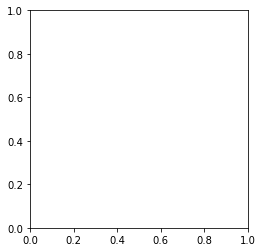

In [34]:
X_train = tf.keras.utils.normalize(X_train,axis = 1)
X_test = tf.keras.utils.normalize(X_test,axis = 1)
plt.imshow(X_train[0] ,cmap = plt.cm.binary )

In [19]:
X_train[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.46152268e-04, -1.90372176e-04, -1.35051765e-04, -1.35051765e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.35051765e-04, -2.06011302e-04, -3.06018984e-04, -4.06187425e-04,
       -5.23414840e-04, -6.85998529e-04, -8.74146187e-04, -1.07777541e-03,
       -1.14193480e-03, -1.15173644e-03, -1.18055797e-03, -1.10295719e-03,
       -1.08152121e-03, -9.80545381e-04, -8.19262298e-04, -6.62231470e-04,
       -5.75778244e-04, -3.63762554e-04, -2.75389652e-04, -1.44915575e-04,
        0.00000000e+00,  

In [20]:
y_train[0]

KeyError: 0

In [ ]:
IMG_SIZE = 28
X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
model  = Sequential()

model.add(Conv2D(64,(3,3),input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

In [ ]:
len(X_train)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam" , metrics = ['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs = 10 , validation_split = 0.3 )

In [ ]:
test_loss , test_accuracy = model.evaluate(X_test , y_test)
print("test_loss",test_loss)
print("validation accuracy",test_accuracy)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report (y_test, np.argmax(predictions, axis = 1)))

In [ ]:
predictions.shape



In [ ]:
y_test.shape

In [ ]:
y_test.reshape(-1,1)

In [ ]:
y_test.shape

In [ ]:
y_pred_labels = [np.argmax(label) for label in predictions]

In [ ]:
confusion_matrix(y_test,y_pred_labels)

In [ ]:
print(y_pred_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(np.argmax(predictions[0]))

In [ ]:
plt.imshow(X_test[0])

In [ ]:
print(np.argmax(predictions[128]))

In [ ]:
plt.imshow(X_test[128])

In [ ]:
img = cv2.imread('two.png')

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

In [ ]:
resized = cv2.resize(gray ,(28,28),interpolation = cv2.INTER_AREA)

In [ ]:
resized.shape

In [ ]:
newimg = tf.keras.utils.normalize(resized , axis = 1)

In [ ]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
newimg.shape

In [ ]:
predictions = model.predict(newimg)

In [ ]:
np.argmax(predictions)